In [191]:
import pyccl as ccl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import simps
from scipy.interpolate import interp1d
from importlib import reload
import cmasher as cmr
import multiprocessing as mp
import time
import os
import shutil
import CM_code.halo_model as halos 
import CM_code.spurious_george as sp
import glob

reload(sp)
reload(halos)

year=1

zlmin, zlmax = 1.0, 1.2
zsmin, zsmax = 0.05, 3.5

out_plot = 'mbias_forecast_y%d_zs=%1.2f-%1.1f.png'%(year, zsmin, zsmax)

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['cmr10']
plt.rcParams['mathtext.fontset'] ='cm'
plt.rc('axes', unicode_minus=False)
plt.rc('axes.formatter', use_mathtext=True)

In [192]:
dat_dir = '/home/b7009348/WGL_project/LSST-SRD-data/LSST_forecast_fits/converged_chains'

StoN = np.zeros([9,9])

a = np.linspace(0.9,0.1,9)
rho = np.linspace(0.1,0.9,9)

for i in range(9):
    for j in range(9):
        if os.path.exists(dat_dir+'/y%d_a=%1.2f_p=%1.2f_chain.npz'%(year,a[i],rho[j])):
            StoN[i,j] = np.load(dat_dir+'/y%d_a=%1.2f_p=%1.2f_chain.npz'%(year,a[i],rho[j]))['StoN']
        else:
            StoN[i,j] = -1
            

StoN = np.flip(StoN, axis=0)

In [193]:
print(StoN)

[[2.2981935  2.43252723 2.58191448 2.7388184  2.83534498 2.97413395
  3.27455405 3.72407843 4.60058362]
 [2.1339616  2.33316595 2.33536643 2.40649801 2.54447844 2.70810927
  3.06064166 3.41176311 4.36694957]
 [1.98433465 2.05306089 2.12958777 2.21175199 2.24574652 2.51575863
  2.65483812 3.05492055 3.91086949]
 [1.71091506 1.78132933 1.84874934 1.89615072 2.03952342 2.17693508
  2.38966407 2.62154878 3.45424838]
 [1.48936422 1.5698274  1.65945024 1.75062313 1.82948411 1.96013517
  2.08459343 2.37341648 2.86676638]
 [1.25036635 1.24889154 1.33295654 1.42939041 1.51184916 1.62278143
  1.69227869 2.01284206 2.54323724]
 [0.90364846 0.95410724 1.01755664 1.12895846 1.2116766  1.33863903
  1.39145891 1.61909252 1.9864728 ]
 [0.61960237 0.67064946 0.69562227 0.74487361 0.7983226  0.90057823
  1.0084092  1.17777078 1.47215519]
 [0.4579809  0.47000919 0.47061156 0.48741499 0.50402162 0.527721
  0.59257498 0.64101326 0.84875965]]


<a list of 0 text.Text objects>

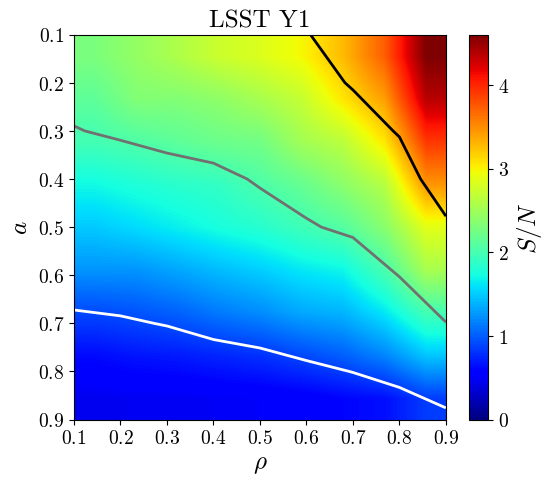

In [194]:
P, A = np.meshgrid(rho,a)        
        
fig, ax = plt.subplots(figsize=[6,5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('LSST Y%d'%year, fontsize=18)

colors = cmr.take_cmap_colors('cmr.neutral', 3, cmap_range=(1.0, 0.0), return_fmt='hex')

sig = ax.contour(P,A,np.flip(StoN, axis=0),[1,2,3], linestyles='solid', linewidths=2, colors=colors)

fmt = {}
strs = [r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']
for l, s in zip(sig.levels, strs):
    fmt[l] = s

cax = ax.imshow(StoN, extent=[rho[0],rho[-1],a[0],a[-1]], 
                aspect='auto', cmap='jet', vmin=0, interpolation='bilinear')

cbar = fig.colorbar(cax)
cbar.set_label(r'$S/N$', fontsize=18)
cbar.ax.tick_params(labelsize=14)
ax.set_xlabel(r'$\rho$', fontsize=18)
ax.set_ylabel(r'$a$', fontsize=18)
locs = []
ax.clabel(sig, sig.levels, inline=True, fmt=fmt, fontsize=18, manual=locs)
#plt.savefig('StoN_y%d_zs=%1.2f-%1.2f.png'%(year, zsmin, zsmax), bbox_inches='tight', dpi=300)

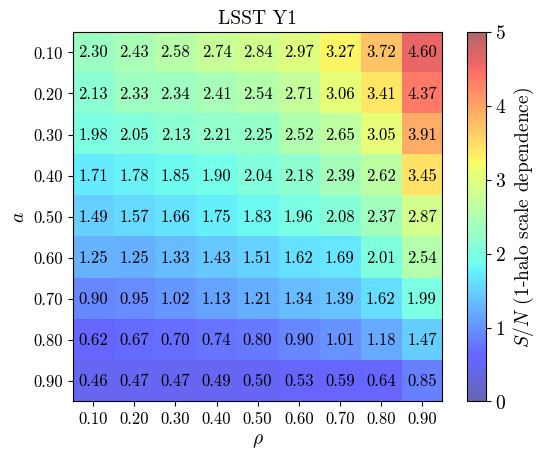

In [196]:
fig, ax = plt.subplots()
im = ax.imshow(StoN, cmap='jet', alpha=0.6, vmin=0.0, vmax=5)
texts = []
for i in range(StoN.shape[0]):
    for j in range(StoN.shape[1]):
        text = ax.annotate(f'{StoN[i, j]:.2f}',
                           xy=(j, i), ha='center', va='center',
                           color='black', fontsize=12)
    texts.append(text)
ax.set_title('LSST Y%d'%year, fontsize=14)
ax.set_xlabel(r'$\rho$', fontsize=14)
ax.set_ylabel(r'$a$', fontsize=14)
ax.set_xticks(ticks=range(9), labels=['%1.2f'%p for p in rho], fontsize=12)
ax.set_yticks(ticks=range(9), labels=['%1.2f'%val for val in np.flip(a)], fontsize=12)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(r'$S/N$ (1-halo scale dependence)', fontsize=14)
plt.savefig('y%d_SNR_mcmc.png'%year, bbox_inches='tight', dpi=300)
plt.show()

#### NOTE: Check Fortuna red and blue amplitudes and take 1-h amplitude as weighted avg of the two based on LSST red fraction